In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import nibabel as nib

In [3]:
from nilearn import plotting

c:\users\alvir\deelearning\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [4]:
from PIL import Image

In [5]:
from nilearn import image

In [6]:
import os

In [7]:
import cv2

In [8]:
DATADIR = 'image_v2\\36\\'
CATEGORIES = ['2015','2016','2017']
data_36 = []

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        data_36.append(cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE))

In [9]:
len(data_36)

1752

In [10]:
label = np.concatenate([(np.zeros(164*3)) , np.ones(210*3) , 2*np.ones(210*3) ])

In [11]:
data_36 = np.array(data_36)

In [12]:
IMG_SIZE = 64

In [13]:
temp = []
for i in range(data_36.shape[0]):
    a = cv2.resize(data_36[i], (IMG_SIZE,IMG_SIZE))
    temp.append([a,label[i]])
            

import random
random.shuffle(temp)

In [14]:
X = []
y = []

for features, labels in temp:
    X.append(features)
    y.append(labels)
X = np.array(X).reshape(-1, IMG_SIZE,IMG_SIZE, 1)
X = X/255.0

In [15]:
X.shape

(1752, 64, 64, 1)

In [16]:
y = np.array(y).flatten()

In [17]:
y.shape

(1752,)

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D,BatchNormalization
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder

Using TensorFlow backend.


In [19]:
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
dummy_y = np_utils.to_categorical(encoded_Y)

In [20]:
dummy_y.shape

(1752, 3)

In [21]:
def cnn_model():
    model = Sequential()
    model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(64, (3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(64))

    model.add(Dense(3))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

In [23]:
estimator = KerasClassifier(build_fn=cnn_model, epochs=5, batch_size=5, verbose=0)
kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("cnn model: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

cnn model: 100.00% (0.00%)


In [24]:
from sklearn.model_selection import LeaveOneOut

In [25]:
loo = LeaveOneOut()

In [ ]:
estimator = KerasClassifier(build_fn=cnn_model, epochs=5, batch_size=5, verbose=0)
results = cross_val_score(estimator, X, dummy_y, cv=loo)
print("cnn model: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [80]:
DATADIR = 'image_v2\\42\\'
CATEGORIES = ['2015','2016','2017']
data_42 = []

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        data_42.append(cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE))

In [204]:
len(data_42)

1752

In [205]:
np.zeros((1,len(data_36))).shape

(1, 1752)

In [206]:
label = np.concatenate([(np.zeros(len(data_36))) , np.ones(len(data_36))])

In [207]:
data = np.array(data_36+data_42)

In [208]:
data.shape

(3504, 93, 158)

In [209]:
label.resize(3504,1)

In [210]:
IMG_SIZE = 64

In [211]:
data.shape

(3504, 93, 158)

In [212]:
temp = []
for i in range(3504):
    a = cv2.resize(data[i], (IMG_SIZE,IMG_SIZE))
    temp.append([a,label[i]])
            

import random
random.shuffle(temp)

In [214]:
X = []
y = []

for features, labels in temp:
    X.append(features)
    y.append(labels)
X = np.array(X).reshape(-1, IMG_SIZE,IMG_SIZE, 1)
X = X/255.0

In [215]:
np.array(X).shape

(3504, 64, 64, 1)

In [246]:
y = np.array(y).flatten()

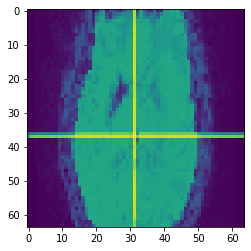

In [216]:
plt.imshow(X[0][:,:,0])

In [217]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

from keras.layers.normalization import BatchNormalization

model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



model.fit(X, y, batch_size = 8, epochs=4, validation_split=0.2)

In [32]:
import torch
from torchvision import models

In [33]:
dir(models)

['AlexNet',
 'DenseNet',
 'GoogLeNet',
 'Inception3',
 'MNASNet',
 'MobileNetV2',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'resnet',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext50_32x4d',
 'segmentation',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'shufflenet_v2_x1_5',
 'shufflenet_v2_x2_0',
 'shufflenetv2',
 'squeezenet',
 'squeezenet1_0',
 'squeezenet1_1',
 'utils',
 'vgg',
 'vgg11',
 'vgg11_bn',
 'vgg13',
 'vgg13_bn',
 'vgg16',
 'vgg16_bn',
 'vgg19',
 'vgg19_bn',
 'video',
 'wide_resnet101_2',
 'wide_resnet50_2']

In [35]:
from torchvision import transforms

transform = transforms.Compose([            #[1]
 transforms.Resize(64),                    #[2]
 transforms.CenterCrop(64),                #[3]
 transforms.ToTensor(),                     #[4]
 transforms.Normalize(                      #[5]
 mean=[0.485, 0.456, 0.406],                #[6]
 std=[0.229, 0.224, 0.225]                  #[7]
 )])

In [36]:
alexnet = models.alexnet(pretrained=True)

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to C:\Users\alvir/.cache\torch\checkpoints\alexnet-owt-4df8aa71.pth
100%|███████████████████████████████████████████████████████████████████████████████| 233M/233M [02:15<00:00, 1.80MB/s]
